In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import transbigdata as tbd

tripdata = pd.read_csv(r'../example/data/TaxiData-Sample.csv')
tripdata.columns = ['track_id','time','lon','lat','OpenStatus','Speed']

#筛选范围内数据
area = gpd.read_file(r'../example/data/gis/深圳路网2.shp')

tripdata = tbd.clean_outofshape(tripdata,area,col=['lon','lat'])

bounds = [113.6,22.4,114.8,22.9]
initialparams = tbd.grid_params(bounds,accuracy = 500)


Optimized index -centerdist: 165.61722332760715
Optimized gridding params: [113.60128984431415, 22.40302856543813, 0.004872390756896538, 0.004496605206422906, 24.25190192912306]


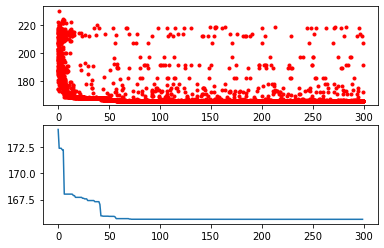

/opt/anaconda3/lib/python3.8/site-packages/geopandas/geodataframe.py:1351: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


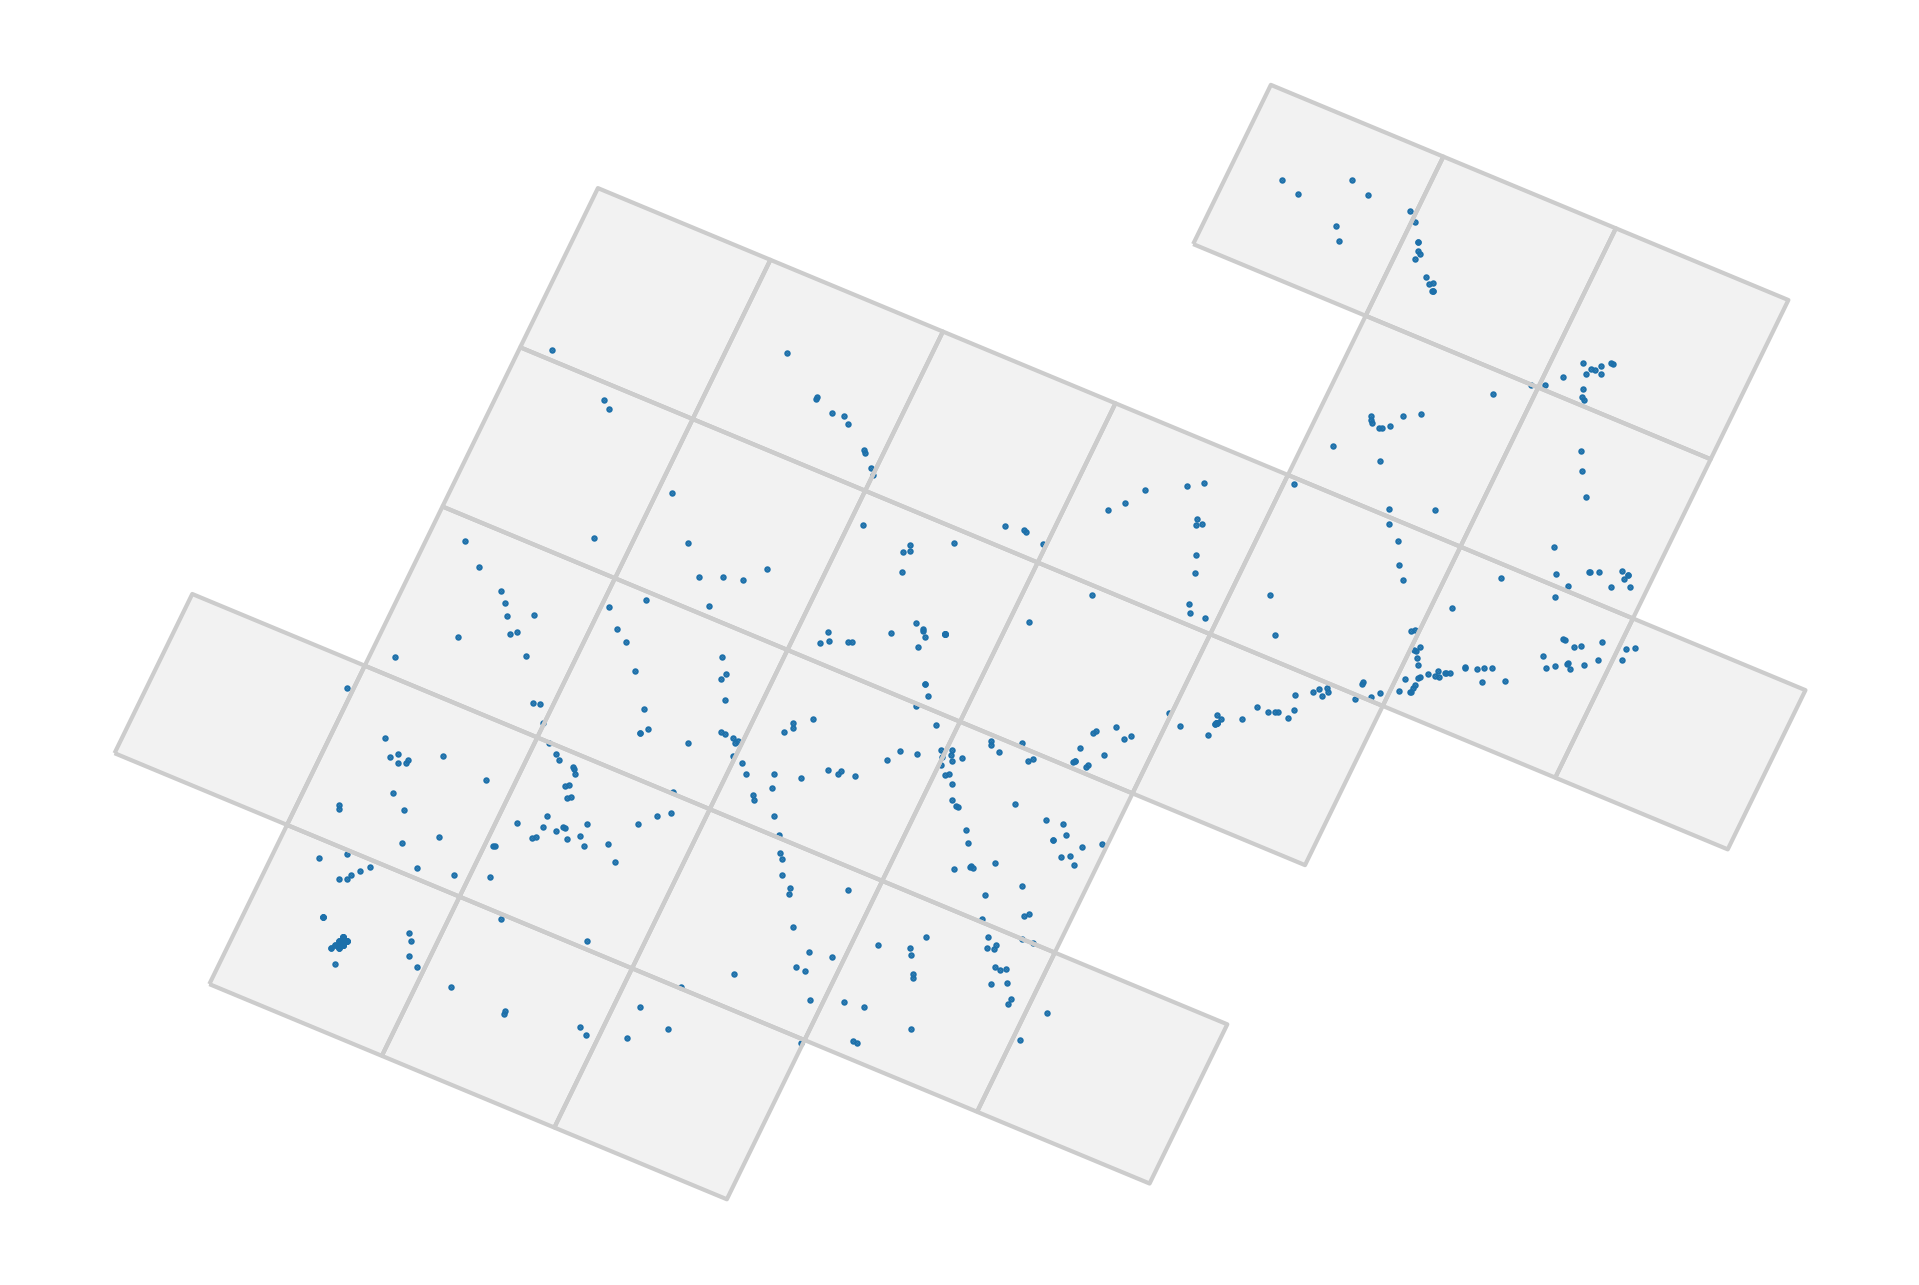

In [3]:
params_optimized = tbd.grid_params_optimize(tripdata,
                                            initialparams,
                                            col=['track_id','lon','lat'],
                                            method='centerdist',
                                            sample=500,
                                            printlog=True)

In [4]:
params_optimized

[113.60372967262931,
 22.401314263248416,
 0.004872390756896538,
 0.004496605206422906,
 45.55992814614408]